# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-sfXv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-sfXv/mcEcc_ct-sfXv_p0_s1_2016-11-02_1352
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-sfXv/mcEcc_ct-sfXv_p0_s2_2016-11-02_1644
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-sfXv/mcEcc_ct-sfXv_p0_s3_2016-11-02_1706
(432, 39)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat',
       u'fovGap', u'fovFade', u'periGap', u'periFade', u'trialT', u'nFrames',
       u'nNa', u'nf000', u'nf090', u'nf180', u'nf270', u'pd000', u'pd090',
       u'pd180', u'pd270', u'qnResp', u'ringSz'],
      dtype='object')


Transforming the data set first.

### Data transformation

In [3]:
# Ring size:
ds.ix[ds.ringSz==25.8,'ringSz'] = 0
# Velocity variables:
ds['vMin'] = np.amin([ds.vL, ds.vR], axis=0)
ds['vMax'] = np.amax([ds.vL, ds.vR], axis=0)
ds['fast'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMax),'fast'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMax),'fast'] = 1
ds['slow'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMin),'slow'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMin),'slow'] = 1
# Spatial frequency variables:
ds['sfMin'] = np.amin([ds['sfL'], ds['sfR']], axis=0)
ds['sfMax'] = np.amax([ds['sfL'], ds['sfR']], axis=0)
ds['sfDiff'] = abs(ds['sfR'] - ds['sfL'])
ds['highSf'] = 0
ds.ix[(ds.nf180==1) & (ds.sfL==ds.sfMax),'highSf'] = 1
ds.ix[(ds.nf000==1) & (ds.sfR==ds.sfMax),'highSf'] = 1
ds['lowSf'] = 0
ds.ix[(ds.nf180==1) & (ds.sfL==ds.sfMin),'lowSf'] = 1
ds.ix[(ds.nf000==1) & (ds.sfR==ds.sfMin),'lowSf'] = 1
#ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
# Using the following variable in multiple instances throughout
ssNoRing = ds[ds.ringSz==0] # no center/surround phenomenon was observed
print ds.head(5)

         expName             time  participant  session  trialN  dirL  dirR  \
0  mcEcc_ct-sfXv  2016-11-02_1352            0        1       1     0   180   
1  mcEcc_ct-sfXv  2016-11-02_1352            0        1       2     0   180   
2  mcEcc_ct-sfXv  2016-11-02_1352            0        1       3     0   180   
3  mcEcc_ct-sfXv  2016-11-02_1352            0        1       4   180     0   
4  mcEcc_ct-sfXv  2016-11-02_1352            0        1       5   180     0   

    vL   vR  szL  ...      ringSz  vMin  vMax  fast  slow  sfMin  sfMax  \
0  9.6  1.2  256  ...    0.000000   1.2   9.6     0     1   0.04   0.11   
1  1.2  9.6  256  ...   62.657143   1.2   9.6     1     0   0.01   0.07   
2  1.2  9.6  256  ...   99.514286   1.2   9.6     1     0   0.01   0.04   
3  1.2  9.6  256  ...   99.514286   1.2   9.6     0     1   0.02   0.02   
4  1.2  9.6  256  ...   99.514286   1.2   9.6     0     1   0.01   0.02   

   sfDiff  highSf lowSf  
0    0.07       1     0  
1    0.06       0     

## Visualization

### Transparency / paternless patchiness

(-0.5, 24)

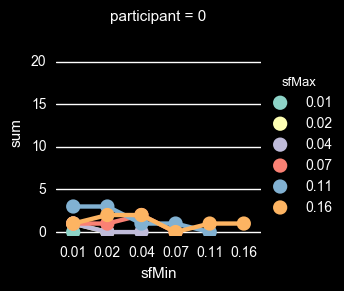

In [4]:
sumU = ds.groupby(['sfMin','sfMax','participant'])['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
g = sns.factorplot(x='sfMin', y='sum', hue='sfMax',col='participant', data=sumU, size=3)
plt.ylim(-0.5,np.max(sumU['size']))

### Fast/slow whole-field (non-patchy) responses

Looking at the fast/slow motion dominating the entire/most of the visual field as a function of the two competing sf's.

#### Fast whole-field responses

(-0.1, 1.1)

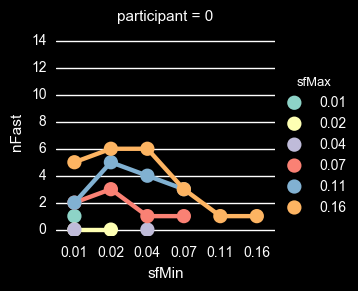

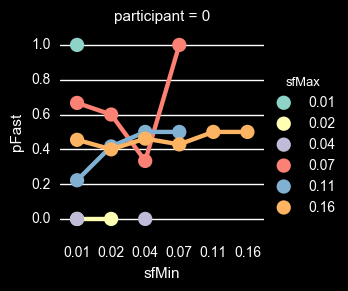

In [5]:
sumFast = ssNoRing.groupby(['sfMin','sfMax','participant'])['fast'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumFast = sumFast.rename(columns={ 'sum' : 'nFast'})
g = sns.factorplot(x='sfMin', y='nFast', hue='sfMax', col='participant', data=sumFast, size=3)
plt.ylim(-0.5,np.max(sumFast['size']))
sumFast = sumFast.rename(columns={ 'mean' : 'pFast'})
g = sns.factorplot(x='sfMin', y='pFast', hue='sfMax', col='participant', data=sumFast, size=3)
plt.ylim(-0.1,1.1)

It seems that fast motion is more likely to dominate the whole field when the relatively high sf (>0.07) is competing with moderately low sf (0.02-0.04).

#### Slow whole-field responses

(-0.1, 1.1)

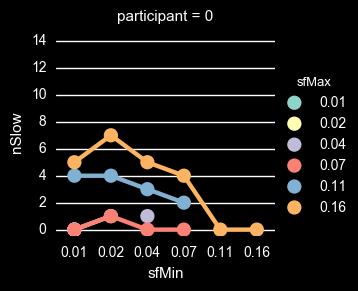

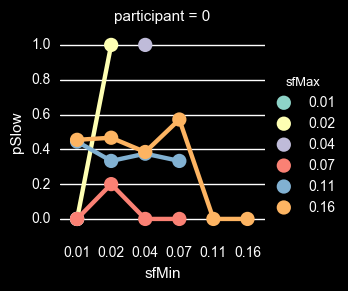

In [6]:
sumSlow = ssNoRing.groupby(['sfMin','sfMax','participant'])['slow'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumSlow = sumSlow.rename(columns={ 'sum' : 'nSlow'})
g = sns.factorplot(x='sfMin', y='nSlow', hue='sfMax', col='participant', data=sumSlow, size=3)
plt.ylim(-0.5,np.max(sumSlow['size']))
sumSlow = sumSlow.rename(columns={ 'mean' : 'pSlow'})
g = sns.factorplot(x='sfMin', y='pSlow', hue='sfMax', col='participant', data=sumSlow, size=3)
plt.ylim(-0.1,1.1)

However, scenarios when the slow motion dominates the whole field seem to be just as frequent, especially when high sf is competing with low to moderate sf.

### High/low sf whole-field responses

#### High-sf whole-field trials

(-0.1, 1.1)

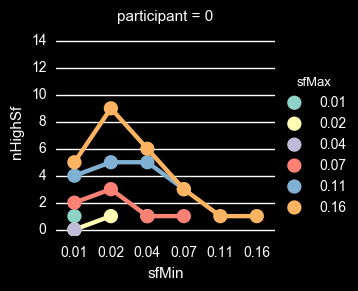

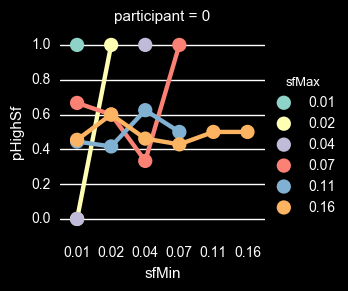

In [7]:
sumHighSf = ssNoRing.groupby(['sfMin','sfMax','participant'])['highSf'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumHighSf = sumHighSf.rename(columns={ 'sum' : 'nHighSf'})
g = sns.factorplot(x='sfMin', y='nHighSf', hue='sfMax', col='participant', data=sumHighSf, size=3)
plt.ylim(-0.5,np.max(sumHighSf['size']))
sumHighSf = sumHighSf.rename(columns={ 'mean' : 'pHighSf'})
g = sns.factorplot(x='sfMin', y='pHighSf', hue='sfMax', col='participant', data=sumHighSf, size=3)
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

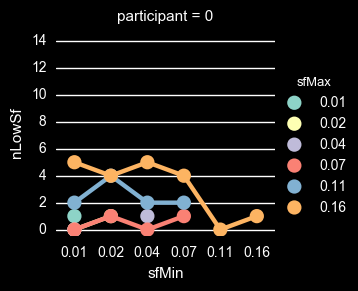

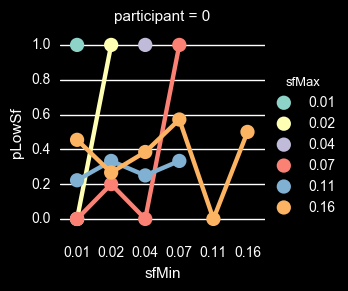

In [8]:
sumLowSf = ssNoRing.groupby(['sfMin','sfMax','participant'])['lowSf'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumLowSf = sumLowSf.rename(columns={ 'sum' : 'nLowSf'})
g = sns.factorplot(x='sfMin', y='nLowSf', hue='sfMax', col='participant', data=sumLowSf, size=3)
plt.ylim(-0.5,np.max(sumLowSf['size']))
sumLowSf = sumLowSf.rename(columns={ 'mean' : 'pLowSf'})
g = sns.factorplot(x='sfMin', y='pLowSf', hue='sfMax', col='participant', data=sumLowSf, size=3)
plt.ylim(-0.1,1.1)

In [9]:
# Computing the proportion of instances when the ring has occurred:
ss = ds[ds.resp=='slow']
sumMM_p = ss.groupby(['resp','sfL','sfR','participant'])['ringSz'].agg([np.count_nonzero, 
                                                                     np.size]).reset_index()
sumMM_p['pRing'] = sumMM_p['count_nonzero'] / sumMM_p['size']
sumMM_p['bvMin'] = sumMM_p['bvMin']
sumMM_p['bvMax'] = sumMM_p['bvMax']
#print sumMM_p['ringSz']
# Getting the subset where the ring size is nonzero and computing the mean size:
ss = ss[ss.ringSz!=0]
sumMM_m = ss.groupby(['bvMin','bvMax','participant'])['ringSz'].agg([np.mean,
                                                                     np.std]).reset_index()
sumMM_m['bvMin'] = sumMM_m['bvMin']
sumMM_m['bvMax'] = sumMM_m['bvMax']
#print sumMM_m['ringSz']
# Plotting:
sns.factorplot(x='bvMax', y='mean', hue='bvMin', col='participant', data=sumMM_m, 
               col_wrap=4, size=3.5)
plt.ylim(0,230)
sns.factorplot(x='bvMax', y='pRing', hue='bvMin', col='participant', data=sumMM_p, 
               col_wrap=4, size=3.5)
plt.ylim(-0.1,1.1)

AttributeError: 'DataFrame' object has no attribute 'resp'

Fast motion in the center.

In [ ]:
# Computing the proportion of instances when the ring has occurred:
ss = ds[ds.resp=='fast']
sumMM_p = ss.groupby(['bvMin','bvMax','participant'])['ringSz'].agg([np.count_nonzero, 
                                                                     np.size]).reset_index()
sumMM_p['pRing'] = sumMM_p['count_nonzero'] / sumMM_p['size']
sumMM_p['bvMin'] = sumMM_p['bvMin']
sumMM_p['bvMax'] = sumMM_p['bvMax']
#print sumMM_p['ringSz']
# Getting the subset where the ring size is nonzero and computing the mean size:
ss = ss[ss.ringSz!=0]
sumMM_m = ss.groupby(['bvMin','bvMax','participant'])['ringSz'].agg([np.mean,
                                                                     np.std]).reset_index()
sumMM_m['bvMin'] = sumMM_m['bvMin']
sumMM_m['bvMax'] = sumMM_m['bvMax']
#print sumMM_m['ringSz']
# Plotting:
sns.factorplot(x='bvMax', y='mean', hue='bvMin', col='participant', data=sumMM_m, 
               col_wrap=4, size=3.5)
plt.ylim(0,230)
sns.factorplot(x='bvMax', y='pRing', hue='bvMin', col='participant', data=sumMM_p, 
               col_wrap=4, size=3.5)
plt.ylim(-0.1,1.1)

# Eye-tracking data

## Data import

In [ ]:
subjEtPath = glob.glob(allSubjDirs[6] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
from cili.extract import extract_event_ranges
ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
print np.max(trials['trialLength'])
#print trials.head(5)

In [ ]:
# Creating my own ranges for each trial, with N number of samples:
#nSamples = 1500
#ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
#print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
#trialStart = trialN # initiating a new variable to collect the 'actual' start
#trialEnd = trialN # the 'actual' end
#print trialN[-1] == 96
#for t in trialN:
    #print t
    # the actual start is the first data point following a trial time stamp:
    #trialStart[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])]
    #trialStart[t-1] = 
    #print t==trialN[-1]
    #if t != 96: # trialN[-1]: #WHY DOESN'T THIS WORK?!
        #print trialTS[t]
        #trialEnd[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])]
    #else:
        #trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
#print trialStart
#print trialEnd